# Exercício PA3-5

Exercício com data de entrega para 7 de dezembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

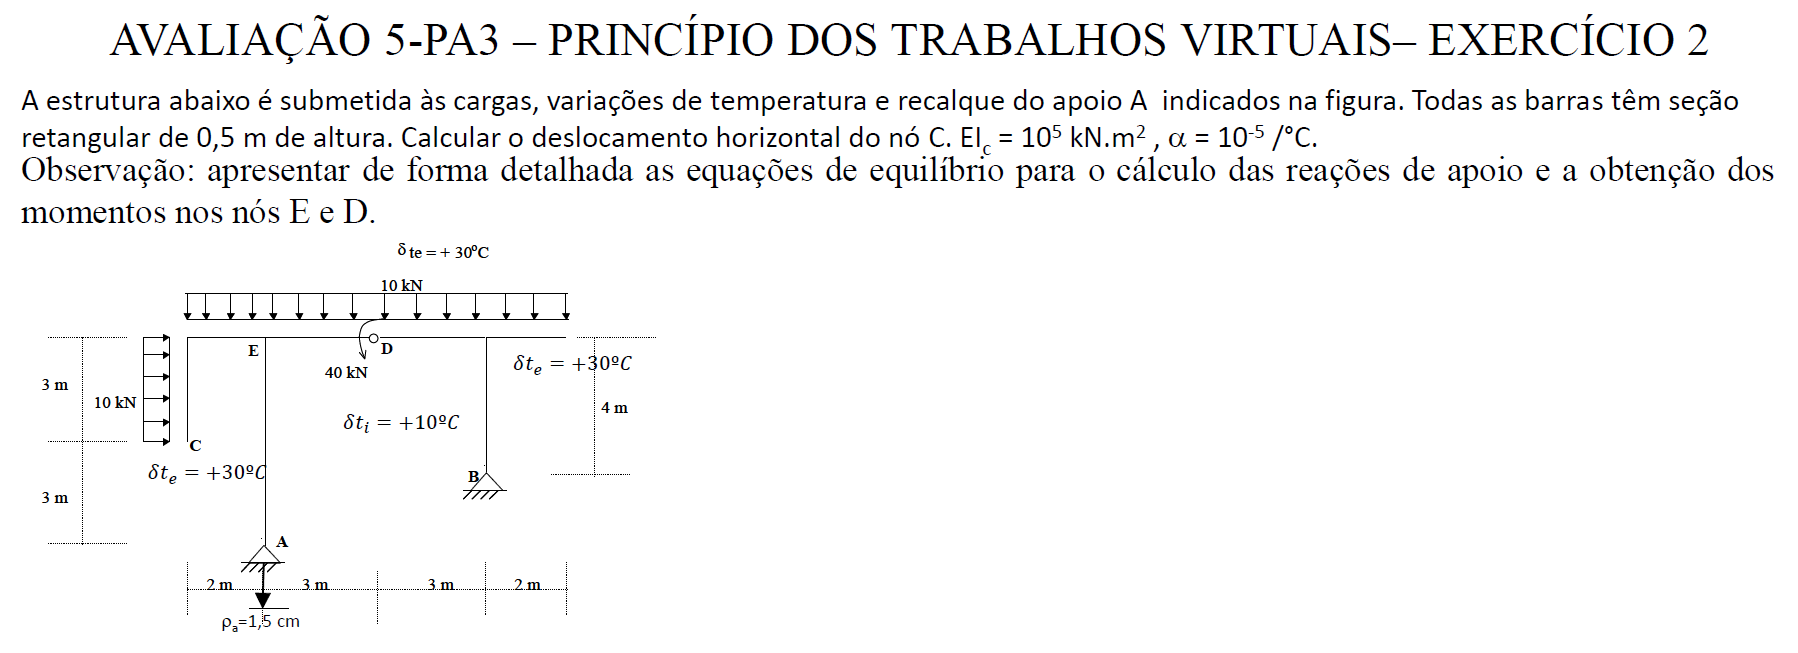

In [2]:
Image("Figuras/PA3-5.png")

# Formulário

## Princípio dos Trabalhos Virtuais

\begin{equation*}
    \delta = \sum_{i=1}^{n}{\int{\frac{\bar{M}_{i}M_{i}}{EI_{i}}}\mathrm{d}x}
\end{equation*}

## Temperatura

### Barras Com Seção Transversal Constante

\begin{equation*}
    \delta = \alpha\cdot \delta t_{g}\cdot A_{\bar{N}} + \frac{\alpha\cdot \Delta t}{h}A_{\bar{M}}
\end{equation*}

Onde,

* $A_{\bar{N}}$ é a área dos diagramas de esforço normal;

* $A_{\bar{M}}$ é a área dos diagramas de momento fletor;

* $\delta t_{g}$ é a variação média de temperatura;

* $\Delta t$ é a diferença de temperatura $\Delta t = \delta t_{i} - \delta t_{e}$ (temperatura interna menos a temperatura externa).

### Barras Com Seção Transversal Variável

\begin{equation*}
    \delta = \alpha\int_{l}{\bar{N}\delta t_{g}}\mathrm{d}s + \alpha\cdot\Delta t\int_{l}{\frac{\bar{M}}{h}}\mathrm{d}s
\end{equation*}

## Recalque

\begin{equation*}
    \delta = -\sum{\bar{R}\cdot \rho}
\end{equation*}

## Utilização

Calcular o deslocamento para os esforços no Estado de Deformação, em seguida, calcular o deslocamento em função da Temperatura e, em seguida, o deslocamento em função dos recalques. Por último, devido à linearidade, utilizar a superposição de efeitos e somar os resultados.

Para fins práticos, temos uma tabela com diversas integrais comuns já calculadas e disponíveis para utilização.

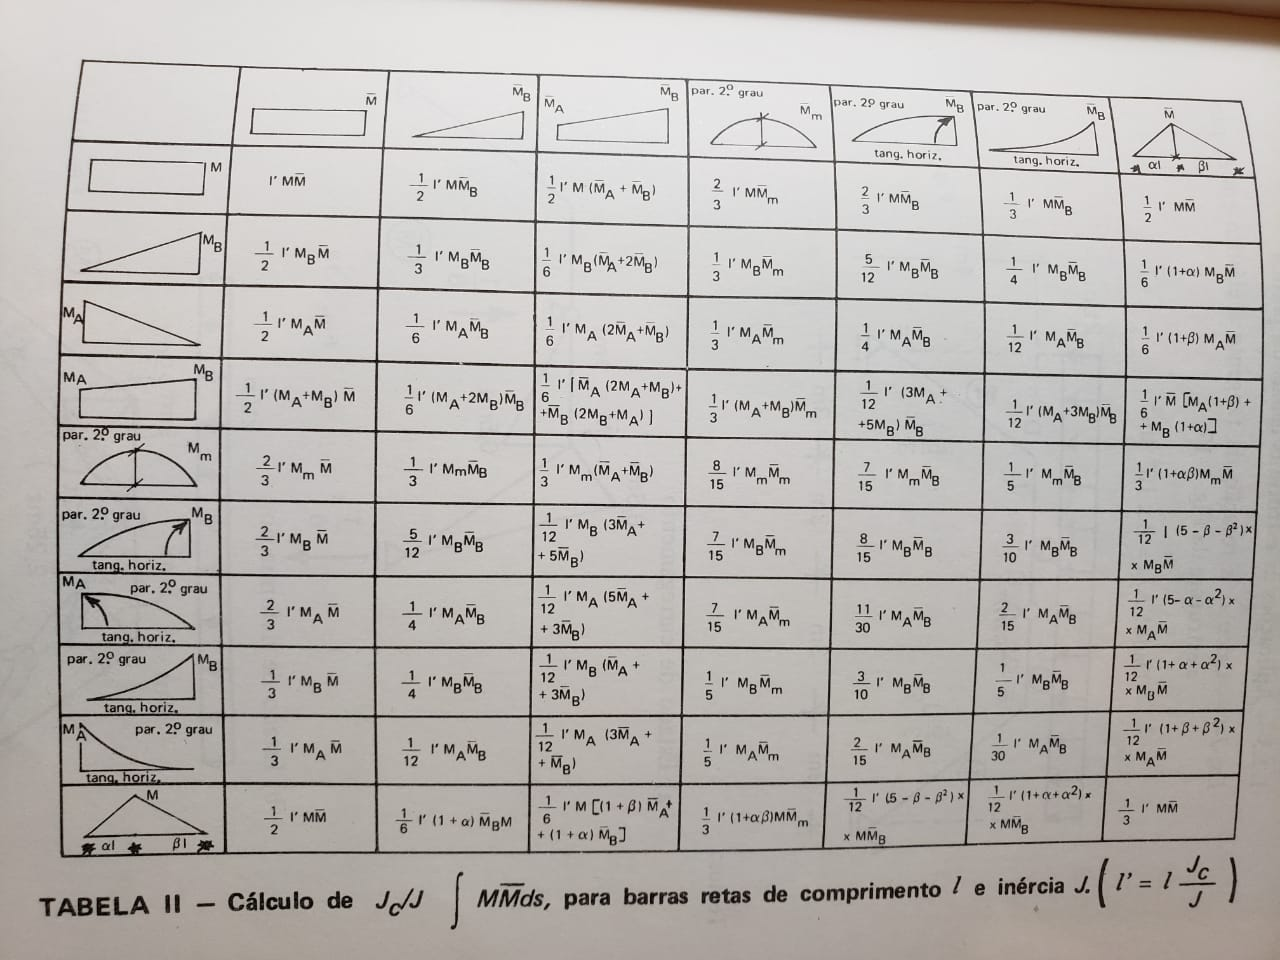

In [3]:
Image("Figuras/tabela integrais.jpg")

# Solução

In [4]:
kN,m,C = sp.symbols('kN,m,C',positive=True)
M,M_b = sp.symbols('M,M_b',cls=sp.Function)
EI,l = sp.symbols('EI,l',positive=True)
delta_i = sp.Integral(M(x)*M_b(x)/EI,(x,0,l))
display(delta_i)

l               
⌠               
⎮ M(x)⋅M_b(x)   
⎮ ─────────── dx
⎮      EI       
⌡               
0               

Para integrar os momentos fletores, as barras seguirão a numeração da figura abaixo:

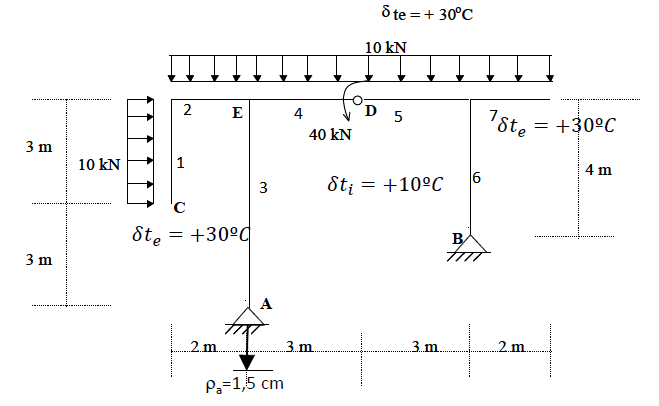

In [5]:
Image("Figuras/PA3-5-0.png")

## Estado de Deformação

Vamos utilizar as equações de equilíbrio para obter as reações de apoio. Assim, temos:

\begin{equation*}
    \sum_{F_{x}} = 0\therefore
\end{equation*}

\begin{equation*}
    10\times 3 + H_{A} + H_{B} = 0\therefore
\end{equation*}

\begin{equation*}
    H_{A} + H_{B} = -30~kN
\end{equation*}

\begin{equation*}
    \sum_{F_{y}} = 0\therefore
\end{equation*}

\begin{equation*}
    -10\times 10 + V_{A} + V_{B} = 0\therefore
\end{equation*}

\begin{equation*}
    V_{A} + V_{B} = 100~kN
\end{equation*}

\begin{equation*}
    \sum_{M_{A}} = 0\therefore
\end{equation*}

\begin{equation*}
    - 10\times 3\times \left(3+\frac{3}{2}\right) - 10\times 10\times 3 - H_{B}\times 2 + V_{B}\times 6 + 40 = 0\therefore
\end{equation*}

\begin{equation*}
    -2H_{B} + 6V_{B} = 395~kN\cdot m 
\end{equation*}

\begin{equation*}
    \sum_{M_{D+}} = 0\therefore
\end{equation*}

\begin{equation*}
    -10\times 5\times\frac{5}{2} + H_{B}\times 4 + V_{B}\times 3 = 0\therefore
\end{equation*}

\begin{equation*}
    4H_{B} + 3V_{B} = 125~kN\cdot m
\end{equation*}


Logo,

\begin{equation*}
    \left[\begin{matrix}
        1   &   0   &   1   &   0 \\
        0   &   1   &   0   &   1 \\
        0   &   0   &   -2  &   6 \\
        0   &   0   &   4   &   3
    \end{matrix}\right]
        \left[\begin{matrix}
        H_{A}   \\  V_{A}   \\  H_{B}   \\  V_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        -30 \\  100 \\  395 \\  125
    \end{matrix}\right]
\end{equation*}

In [6]:
K = sp.Matrix([[1,0,1,0],[0,1,0,1],[0,0,-2,6],[0,0,4,3]])
f = sp.Matrix([[-30],[100],[395],[125]])
display(K.solve(f))

⎡-31/2⎤
⎢     ⎥
⎢ 39  ⎥
⎢     ⎥
⎢-29/2⎥
⎢     ⎥
⎣ 61  ⎦

Assim, as reações de apoio são:

* $H_{A} = -\frac{31}{2}~kN = -15,5~kN$

* $V_{A} = 39~kN$

* $H_{B} = -\frac{29}{2}~kN = 14,5~kN$

* $V_{B} = 61~kN$

## Estado de Carregamento

Como estamos interessados no deslocamento horizontal no nó $C$, vamos inserir uma carga virtual $P=1$, na direção positiva de $x$, no nó $C$.

Vamos utilizar as mesmas equações de equilíbrio do Estado de Deformação para obter as reações de apoio.

\begin{equation*}
    \sum_{F_{x}} = 0\therefore
\end{equation*}

\begin{equation*}
    1 + H_{A} + H_{B} = 0\therefore
\end{equation*}

\begin{equation*}
    H_{A} + H_{B} = -1
\end{equation*}

\begin{equation*}
    \sum_{F_{y}} = 0\therefore
\end{equation*}

\begin{equation*}
    V_{A} + V_{B} = 0
\end{equation*}

\begin{equation*}
    \sum_{M_{A}} = 0\therefore
\end{equation*}

\begin{equation*}
    -1\times 3 - H_{B}\times 2 + V_{B}\times 6 = 0\therefore
\end{equation*}

\begin{equation*}
    -2H_{B} + 6V_{B} = 3
\end{equation*}

\begin{equation*}
    \sum_{M_{D+}} = 0\therefore
\end{equation*}

\begin{equation*}
    4H_{B} + 3V_{B} = 0
\end{equation*}

Logo,

\begin{equation*}
    \left[\begin{matrix}
        1   &   0   &   1   &   0 \\
        0   &   1   &   0   &   1 \\
        0   &   0   &   -2  &   6 \\
        0   &   0   &   4   &   3
    \end{matrix}\right]
        \left[\begin{matrix}
        H_{A}   \\  V_{A}   \\  H_{B}   \\  V_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        -1  \\  0   \\  3   \\  0
    \end{matrix}\right]
\end{equation*}

In [7]:
K = sp.Matrix([[1,0,1,0],[0,1,0,1],[0,0,-2,6],[0,0,4,3]])
f = sp.Matrix([[-1],[0],[3],[0]])
display(K.solve(f))

⎡-7/10⎤
⎢     ⎥
⎢-2/5 ⎥
⎢     ⎥
⎢-3/10⎥
⎢     ⎥
⎣ 2/5 ⎦

Assim, as reações de apoio são:

* $H_{A} = -\frac{7}{10}~kN = -0,7~kN$

* $V_{A} = -\frac{2}{5}~kN = -0,4~kN$

* $H_{B} = -\frac{3}{10}~kN = -0,3~kN$

* $V_{B} = \frac{2}{5}~kN = 0,4~kN$

## Barra 1

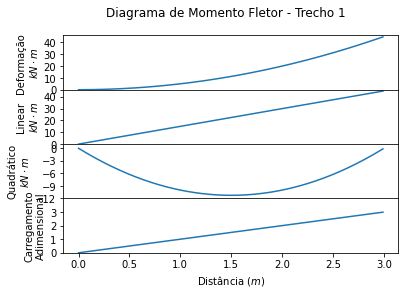

In [8]:
t = np.arange(0.0, 3.0, 0.01)

s1 = 10*(t**2)/2
s2 = 45*t/3
s3 = (10/2)*(t**2 - 3*t)
s4 = t

fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 1')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(0., 46.0, 10))
axs[0].set_ylim(0, 46)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0., 46.0, 10))
axs[1].set_ylim(0, 46)
axs[1].set_ylabel('Linear\n$kN\cdot m$')

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-12., 1., 3))
axs[2].set_ylim(-12, 1)
axs[2].set_ylabel('Quadrático\n$kN\cdot m$')

axs[3].plot(t, s4)
axs[3].set_yticks(np.arange(0., 4.0, 1))
axs[3].set_ylim(0, 4)
axs[3].set_ylabel('Carregamento\nAdimensional')
axs[3].set_xlabel('Distância ($m$)')

plt.show()

Temos, portanto, duas componentes a integrar separadamente e somar por superposição. Uma componente linear, e outra quadrática.

Temos as seguintes equações:

### Linear

\begin{equation*}
    \frac{1}{3}l'M_{B}\bar{M}_{B}
\end{equation*}

### Parábola

\begin{equation*}
    \frac{1}{3}l'M_{m}\bar{M}_{B}
\end{equation*}

Onde $l'=l\frac{J_{C}}{J}=\frac{l}{EI}$

In [9]:
delta_1 = (3/EI)*((1/3)*45*3 + (1/3)*(10*(3**2)/8)*3)
display(delta_1)

168.75
──────
  EI  

## Barra 2

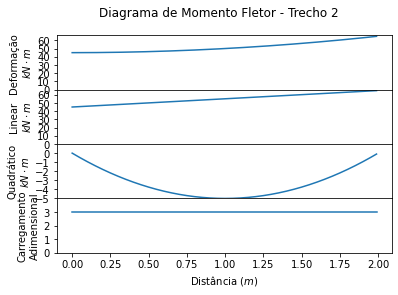

In [10]:
t = np.arange(0.0, 2.0, 0.01)

s1 = 45 + 10*(t**2)/2
s2 = (65-45)*t/2 + 45
s3 = (10/2)*(t**2 - 2*t)
s4 = 0*t+3

fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 2')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(0., 66.0, 10))
axs[0].set_ylim(0, 66)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0., 66.0, 10))
axs[1].set_ylim(0, 66)
axs[1].set_ylabel('Linear\n$kN\cdot m$')

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-5., 1., 1))
axs[2].set_ylim(-5, 1)
axs[2].set_ylabel('Quadrático\n$kN\cdot m$')

axs[3].plot(t, s4)
axs[3].set_yticks(np.arange(0., 4.0, 1))
axs[3].set_ylim(0, 4)
axs[3].set_ylabel('Carregamento\nAdimensional')
axs[3].set_xlabel('Distância ($m$)')

plt.show()

Neste caso, a figura é composta, como no anterior, mas não mais por um triângulo, mas sim por um trapézio. Assim, para esta configuração, temos:

### Linear

\begin{equation*}
    \frac{1}{2}l'\left(M_{A}+M_{B}\right)\bar{M}
\end{equation*}

### Parábola

\begin{equation*}
    \frac{2}{3}l'M_{m}\bar{M}
\end{equation*}

In [11]:
delta_2 = (2/EI)*(((45 + 65)/2)*3 + (2/3)*(-10*(2**2)/8)*3)
display(delta_2)

310.0
─────
  EI 

## Barra 3

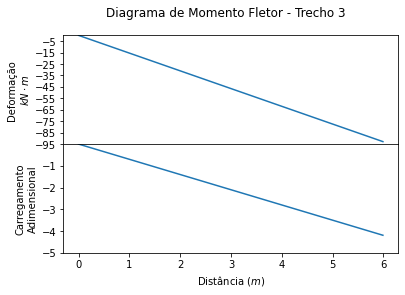

In [12]:
t = np.arange(0.0, 6.0, 0.01)

s1 = -15.5*t
s2 = -0.7*t

fig, axs = plt.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 3')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-95., 0., 10))
axs[0].set_ylim(-95, 0)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(-5., 0., 1))
axs[1].set_ylim(-5, 0)
axs[1].set_ylabel('Carregamento\nAdimensional')
axs[1].set_xlabel('Distância ($m$)')

plt.show()

Este trecho apresenta apenas área triangular, em ambos os estados, sendo as duas no mesmo sentido. Assim, a equação para este caso fica:

\begin{equation*}
    \frac{1}{3}l'M_{B}\bar{M}_{B}
\end{equation*}

In [13]:
delta_3 = (6/EI)*((1/3)*93*4.2)
display(delta_3)

781.2
─────
  EI 

## Barra 4

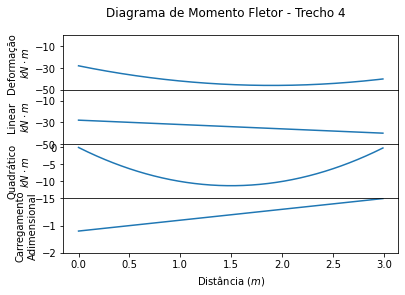

In [14]:
t = np.arange(0.0, 3.0, 0.01)

s1 = 65 - 93 - (39-10*2)*t + 10*(t**2)/2
s2 = (28-40)*t/3 -28
s3 = (10/2)*(t**2 - 3*t)
s4 = 3 - 4.2 + 0.4*t

fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 4')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-50., 0., 20))
axs[0].set_ylim(-50, 0)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(-50., 0., 20))
axs[1].set_ylim(-50, 0)
axs[1].set_ylabel('Linear\n$kN\cdot m$')

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-15., 1., 5))
axs[2].set_ylim(-15, 1)
axs[2].set_ylabel('Quadrático\n$kN\cdot m$')

axs[3].plot(t, s4)
axs[3].set_yticks(np.arange(-2., 0., 1))
axs[3].set_ylim(-2, 0)
axs[3].set_ylabel('Carregamento\nAdimensional')
axs[3].set_xlabel('Distância ($m$)')

plt.show()

Este caso, a figura é semelhante à Barra 2, porém com um triângulo no estado de carregamento. Assim, para esta configuração, temos:

### Linear

\begin{equation*}
    \frac{1}{6}l'\bar{M}_{A}\left(2M_{A}+M_{B}\right)
\end{equation*}

### Parábola

\begin{equation*}
    \frac{1}{3}l'\bar{M}_{A}M_{m}
\end{equation*}

In [15]:
delta_4 = (3/EI)*((1/6)*1.2*(2*28+40) + (1/3)*1.2*(10*(3**2)/8))
display(delta_4)

71.1
────
 EI 

## Barra 5

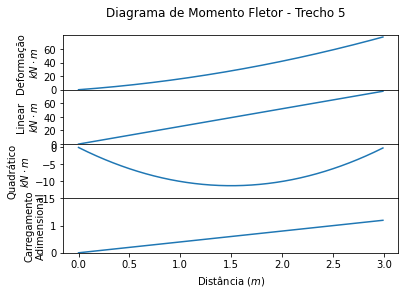

In [16]:
t = np.arange(0.0, 3.0, 0.01)

s1 = (10*5-39)*t + 10*(t**2)/2
s2 = (78/3)*t
s3 = (10/2)*(t**2 - 3*t)
s4 = 0.4*t

fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 5')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(0., 80., 20))
axs[0].set_ylim(0, 80)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0., 80., 20))
axs[1].set_ylim(0, 80)
axs[1].set_ylabel('Linear\n$kN\cdot m$')

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-15., 1., 5))
axs[2].set_ylim(-15, 1)
axs[2].set_ylabel('Quadrático\n$kN\cdot m$')

axs[3].plot(t, s4)
axs[3].set_yticks(np.arange(0., 2., 1))
axs[3].set_ylim(0, 2)
axs[3].set_ylabel('Carregamento\nAdimensional')
axs[3].set_xlabel('Distância ($m$)')

plt.show()

Nesta configuração, temos as seguintes equações, semelhantes à Barra 1:

### Linear

\begin{equation*}
    \frac{1}{3}l'M_{B}\bar{M}_{B}
\end{equation*}

### Parábola

\begin{equation*}
    \frac{1}{3}l'M_{m}\bar{M}_{B}
\end{equation*}

In [17]:
delta_5 = (3/EI)*((1/3)*78*1.2 + (1/3)*(10*(3**2)/8)*1.2)
display(delta_5)

107.1
─────
  EI 

## Barra 6

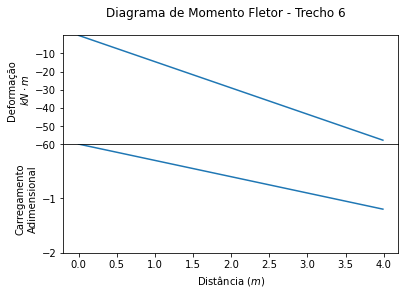

In [18]:
t = np.arange(0.0, 4.0, 0.01)

s1 = -14.5*t
s2 = -0.3*t

fig, axs = plt.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 6')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-60., 0., 10))
axs[0].set_ylim(-60, 0)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(-2., 0., 1))
axs[1].set_ylim(-2, 0)
axs[1].set_ylabel('Carregamento\nAdimensional')
axs[1].set_xlabel('Distância ($m$)')

plt.show()

Esta configuração é semelhante à da Barra 3. Assim, temos:

\begin{equation*}
    \frac{1}{3}l'M_{B}\bar{M}_{B}
\end{equation*}

In [19]:
delta_6 = (4/EI)*((1/3)*58*1.2)
display(delta_6)

92.8
────
 EI 

## Barra 7

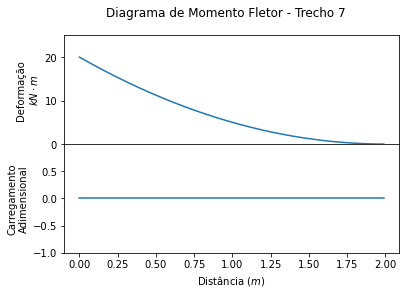

In [20]:
t = np.arange(0.0, 2.0, 0.01)

s1 = 20 - 10*t + 5*(t**2 - 2*t)
s2 = 0*t

fig, axs = plt.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle('Diagrama de Momento Fletor - Trecho 7')


# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(0., 25., 10))
axs[0].set_ylim(0, 25)
axs[0].set_ylabel('Deformação\n$kN\cdot m$')

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(-1., 1., 0.5))
axs[1].set_ylim(-1, 1)
axs[1].set_ylabel('Carregamento\nAdimensional')
axs[1].set_xlabel('Distância ($m$)')

plt.show()

Neste caso, o momento no estado de carregamento é nulo e, portanto, a integral também é nula.

## Somatório das Integrais

In [21]:
delta_C = (delta_1 + delta_2 + delta_3 + delta_4 + delta_5 + delta_6).subs(EI,(10**5)*kN*m**2)*kN*m**3
display(delta_C)

0.0153095⋅m

Assim, devido apenas ao efeito das cargas, temos:

\begin{equation*}
    \delta_{xC} = 15,31~mm
\end{equation*}

## Efeito da Temperatura

\begin{equation*}
    \delta = \alpha\cdot \delta t_{g}\cdot A_{\bar{N}} + \frac{\alpha\cdot \Delta t}{h}A_{\bar{M}}
\end{equation*}

OBS: Para o cálculo do $A_{M}$, serão considerados apenas os momentos das barras 3 a 6, já que as demais estão sob a mesma temperatura em ambos os lados ($\Delta T=0$).

In [22]:
A_N = -1*2 + 0.4*6 - (1-0.7)*3 - (1-0.7)*3 - 0.4*4
A_M = 6*4.2/2 + 3*1.2/2 + 3*1.2/2 - 4*1.2/2
alpha = 1e-5
t_e = 30
t_i = 10
t_g = ((t_e+t_i)/2)
Delta_T = t_e - t_i
h = 0.5

In [23]:
delta_T = (alpha*t_g*A_N + alpha*Delta_T*A_M/h)*m
display(delta_T)

0.00492⋅m

Assim, temos:

\begin{equation*}
    \delta_{xT} = 4,92~mm
\end{equation*}

## Efeito do Recalque

\begin{equation*}
    \delta = -\sum{\bar{R}\cdot \rho}
\end{equation*}

In [24]:
delta_R = 0

Neste caso o efeito do recalque é nulo, pois estamos interessados no deslocamento na direção $x$, e o recalque deu-se na direção $y$.

## Deslocamento Total

In [25]:
delta = delta_C + delta_T + delta_R
display(delta)

0.0202295⋅m

Portanto,

\begin{equation*}
    \delta = 20,23~mm
\end{equation*}